# Imp Liberaries

In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [2]:
## Uploading Data ##

df = pd.read_csv("IMDbMoviesIndia.csv",encoding="Latin1")
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# Uderstanding of Data

In [3]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


# Data Cleaning

In [5]:
# checking null values
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
# handling null values and removing duplicate values.

# we have to predict rating of movies and rating column null vaues is more than 50% so i drop null values based on rating column
df.dropna(subset=["Rating"],axis=0,inplace = True)

# we can drop genre,actor1,2,3 null values 
df.dropna(subset=["Genre","Actor 1","Actor 2","Actor 3"],axis=0,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), object(8)
memory usage: 649.5+ KB


In [77]:
#Checking if there are any typos

for col in df.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(df[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
['Gadhvi ' 'Yaaram' 'Aur Pyaar Ho Gaya' ... 'Zulm Ko Jala Doonga' 'Zulmi'
 'Zulm-O-Sitam']

 ------------------------------------------------------------ 

Name of Column: Genre
['Drama' 'Comedy' 'Horror' 'Action' 'Crime' 'Thriller' 'Adventure' 'Sport'
 'Biography' 'Documentary' 'Mystery' 'Musical' 'Romance' 'Fantasy'
 'Sci-Fi' 'Music' 'Family' 'History' 'Animation' 'War']

 ------------------------------------------------------------ 

Name of Column: Director
['Gaurav Bakshi' 'Ovais Khan' 'Rahul Rawail' ... 'Sumitra Bhave'
 'Girish Girija Joshi' 'Mozez Singh']

 ------------------------------------------------------------ 

Name of Column: Actor 1
['Rasika Dugal' 'Prateik' 'Bobby Deol' ... 'Sunil Sukthankar'
 'Darsheel Safary' 'Meghan Jadhav']

 ------------------------------------------------------------ 

Name of Column: Actor 2
['Vivek Ghamande' 'Ishita Raj' 'Aishwarya Rai Bachchan' ...
 'Prince Daniel' 'Sarah Jane Dias' 'Jayamalini']

 -----------------------

In [9]:
# In some columns there typos we need to remove it.

#Extracting only the text part from the Name column
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')

# Replacing the brackets from year column as observed above
df['Year'] = df['Year'].astype(str).str.replace('-', "", regex=True).astype(int)
df['Votes'] = df['Votes'].astype(str).str.replace(',', "", regex=True).astype(int)

# Splitting the genre by , to keep only unique genres and replacing the null values with mode
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)


#Convert 'Duration' to numeric and replacing the min, while keeping only numerical part
df['Duration'] = pd.to_numeric(df['Duration'].replace(r' min', '', regex=True), errors='coerce').astype(int)
# fill the duration with mean
df['Duration'].fillna(df['Duration'].mean(),inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [12]:
# drop duplicate values from the data
df.drop_duplicates(subset=['Name','Year'],inplace=True)
df.dropna(subset=["Name"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7541 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7541 non-null   object 
 1   Year      7541 non-null   int32  
 2   Duration  7541 non-null   int32  
 3   Genre     7541 non-null   object 
 4   Rating    7541 non-null   float64
 5   Votes     7541 non-null   int32  
 6   Director  7541 non-null   object 
 7   Actor 1   7541 non-null   object 
 8   Actor 2   7541 non-null   object 
 9   Actor 3   7541 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 559.7+ KB


In [13]:
df1 = df

# Data analysis

In [14]:
df.describe(include="all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,7541,7541.000000,7541.000000,7541,7541.000000,7541.000000,7541,7541,7541,7541
unique,6896,NaN,NaN,20,NaN,NaN,2951,2411,2777,3024
top,Mr,NaN,NaN,Drama,NaN,NaN,Mahesh Bhatt,Jeetendra,Rekha,Pran
freq,18,NaN,NaN,2479,NaN,NaN,45,140,79,74
mean,NaN,1993.403660,133.829863,NaN,5.810423,2029.506697,NaN,NaN,NaN,NaN
std,NaN,19.993014,21.938402,NaN,1.368325,11879.582996,NaN,NaN,NaN,NaN
min,NaN,1917.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1980.000000,125.000000,NaN,4.900000,18.000000,NaN,NaN,NaN,NaN
50%,NaN,1996.000000,135.000000,NaN,6.000000,61.000000,NaN,NaN,NaN,NaN
75%,NaN,2011.000000,144.000000,NaN,6.800000,456.000000,NaN,NaN,NaN,NaN


In [94]:
# max and min voting movie

Highest_voting = df['Votes'].max()
Highest_voting_ind = df['Votes'].idxmax()
print("Highest_voting ::",Highest_voting)
Lowest_voting = df['Votes'].min()
Lowest_voting_ind = df['Votes'].idxmin()
print("Lowest_voting ::",Lowest_voting)
print("\n","-"*60,"\n")

# Highest  and lowest voting movie name

Highest_voting_movie_name = df.loc[Highest_voting_ind]['Name']

print("Highest_voting_movie_name ::",Highest_voting_movie_name)

Lowest_voting_movie_name = df.loc[Lowest_voting_ind]['Name']

print("Lowest_voting_movie_name ::",Lowest_voting_movie_name)

Highest_voting :: 591417
Lowest_voting :: 5

 ------------------------------------------------------------ 

Highest_voting_movie_name :: Life of Pi
Lowest_voting_movie_name :: Aabshar


In [95]:
# max and min Rating movie

Highest_Rating = df['Rating'].max()
Highest_Rating_ind = df['Rating'].idxmax()
print("Highest_Rating ::",Highest_Rating)
Lowest_Rating = df['Rating'].min()
Lowest_Rating_ind = df['Rating'].idxmin()
print("Lowest_Rating ::",Lowest_Rating)
print("\n","-"*60,"\n")

# Highest  and lowest Rating movie name

Highest_Rating_movie_name = df.loc[Highest_Rating_ind]['Name']

print("Highest_Rating_movie_name ::",Highest_Rating_movie_name)

Lowest_Rating_movie_name = df.loc[Lowest_Rating_ind]['Name']

print("Lowest_Rating_movie_name ::",Lowest_Rating_movie_name)

Highest_Rating :: 10.0
Lowest_Rating :: 1.1

 ------------------------------------------------------------ 

Highest_Rating_movie_name :: Love Qubool Hai
Lowest_Rating_movie_name :: Sadak 


In [17]:
# Director with no of movies

director_count = df["Director"].value_counts()
most_popular_director = director_count.idxmax()
no_movie_directed = director_count.max()
print("most_popular_director ::",most_popular_director)
print('no_movie_directed by ',most_popular_director,'::',no_movie_directed)
print("\n","-"*100,"\n")

director_count = df["Director"].value_counts()
least_popular_director = director_count.idxmin()
no_movie_directed = director_count.min()
print("least_popular_director ::",least_popular_director)
print('no_movie_directed by ',least_popular_director,'::',no_movie_directed)


most_popular_director :: Mahesh Bhatt
no_movie_directed by  Mahesh Bhatt :: 45

 ---------------------------------------------------------------------------------------------------- 

least_popular_director :: Seema Desai
no_movie_directed by  Seema Desai :: 1


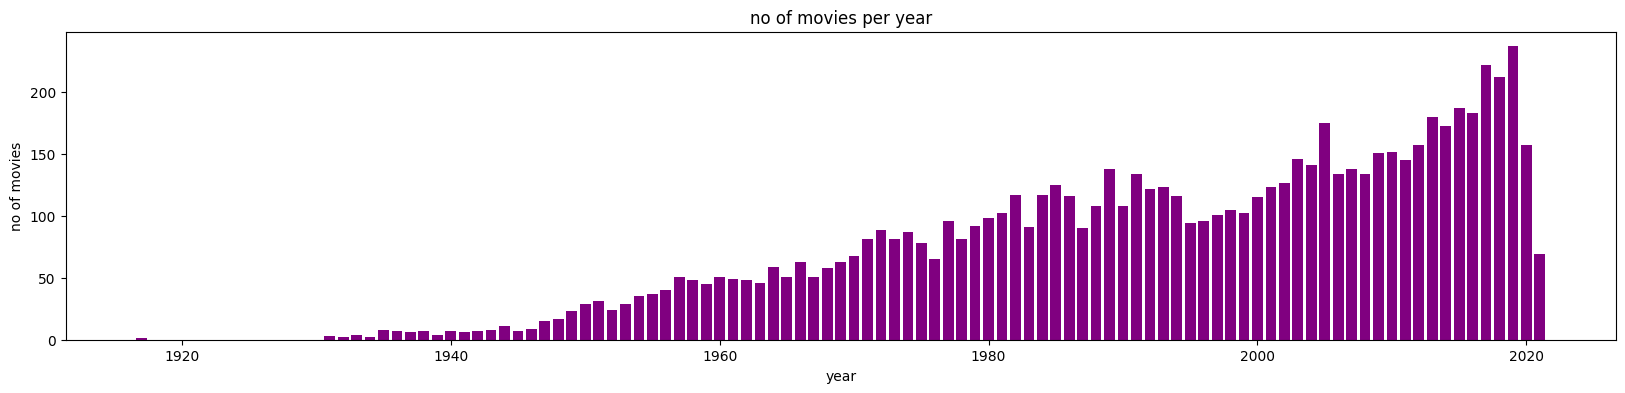

In [40]:
# yearly released movie

x = df["Year"].value_counts().keys()
y = df["Year"].value_counts()
pt.figure(figsize=(20,4))
ac = pt.bar(x,y,color="purple")
pt.xlabel("year")
pt.ylabel("no of movies")
pt.title("no of movies per year")
pt.show()

Text(0.5, 1.0, 'Top 10 genre')

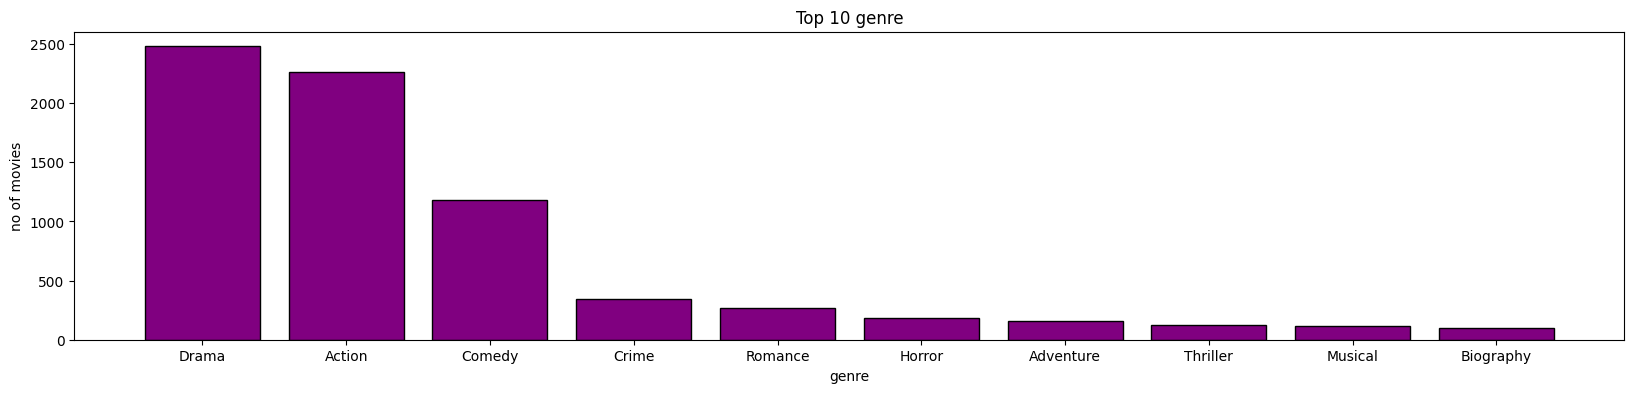

In [76]:
# no of movies by genre Top 10

x = df["Genre"].value_counts().sort_values(ascending=False)[:10].keys()
y = df["Genre"].value_counts().sort_values(ascending=False)[:10]
pt.figure(figsize=(20,4))
ac = pt.bar(x,y,color="purple",edgecolor="black")
pt.xlabel("genre")
pt.ylabel("no of movies")
pt.title("Top 10 genre")

# pt.xticks(x,label)

Text(0.5, 1.0, 'Top 10 Actor 3')

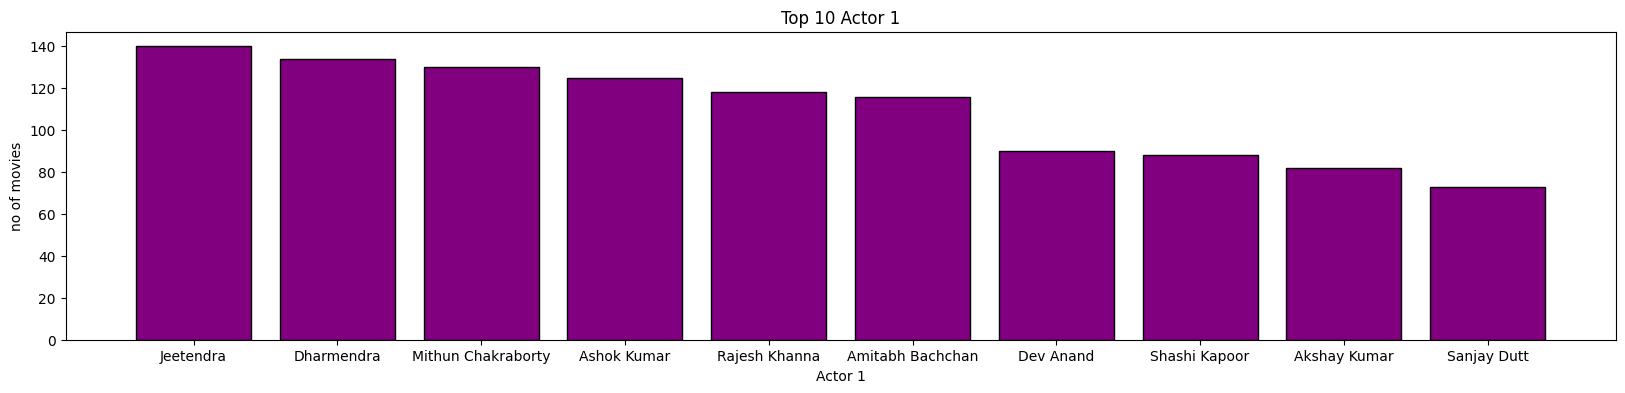

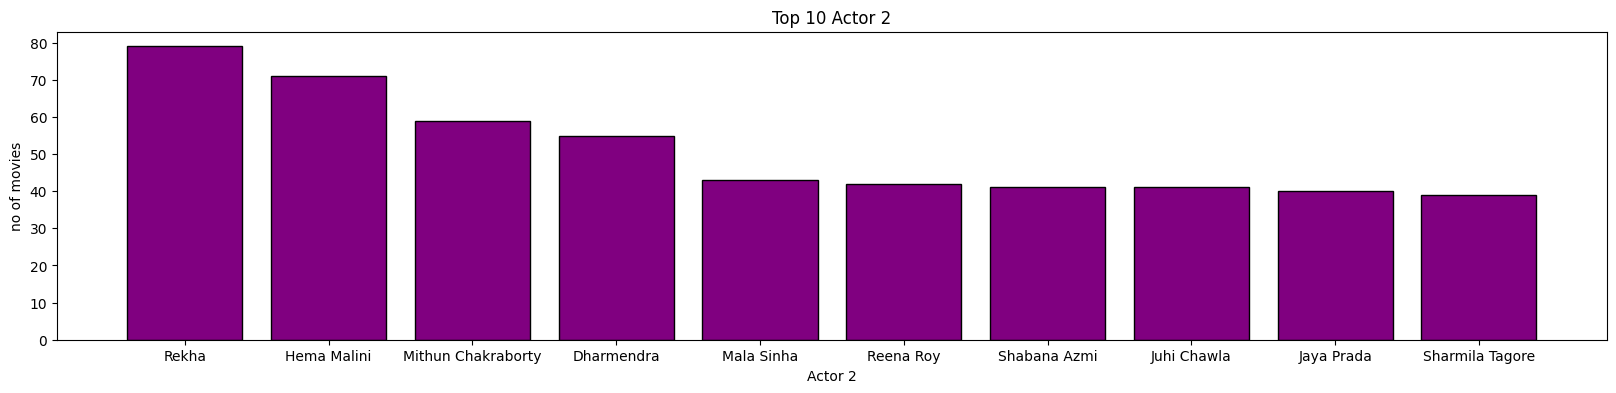

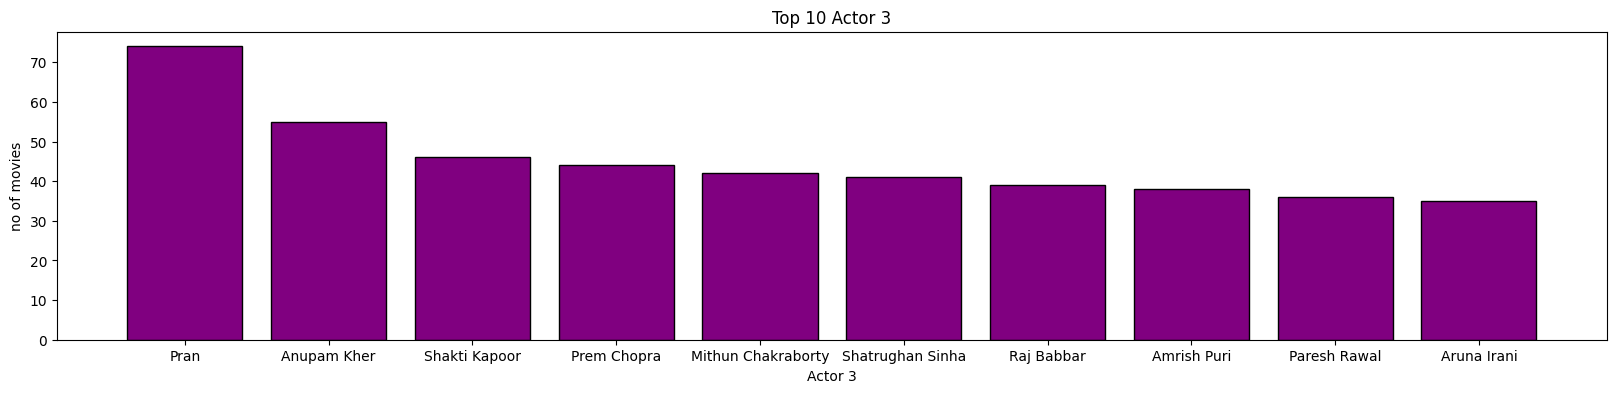

In [74]:
x = df["Actor 1"].value_counts().sort_values(ascending=False)[:10].keys()
y = df["Actor 1"].value_counts().sort_values(ascending=False)[:10]
pt.figure(figsize=(20,4))
ac = pt.bar(x,y,color="purple",edgecolor="black")
pt.xlabel("Actor 1")
pt.ylabel("no of movies")
pt.title("Top 10 Actor 1")

x = df["Actor 2"].value_counts().sort_values(ascending=False)[:10].keys()
y = df["Actor 2"].value_counts().sort_values(ascending=False)[:10]
pt.figure(figsize=(20,4))
ac = pt.bar(x,y,color="purple",edgecolor="black")
pt.xlabel("Actor 2")
pt.ylabel("no of movies")
pt.title("Top 10 Actor 2")

x = df["Actor 3"].value_counts().sort_values(ascending=False)[:10].keys()
y = df["Actor 3"].value_counts().sort_values(ascending=False)[:10]
pt.figure(figsize=(20,4))
ac = pt.bar(x,y,color="purple",edgecolor="black")
pt.xlabel("Actor 3")
pt.ylabel("no of movies")
pt.title("Top 10 Actor 3")

# Data Preprocessing 

In [81]:
# Feature Engineering

# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

Director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = Director_mean_rating

Actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor 1_encoded'] = Actor1_mean_rating

Actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor 2_encoded'] = Actor1_mean_rating

Actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor 3_encoded'] = Actor3_mean_rating

In [83]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor 1_encoded,Actor 2_encoded,Actor 3_encoded
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.167527,7.000000,6.850000,6.850000,7.000000
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.800680,4.400000,5.420000,5.420000,4.450000
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.800680,5.358824,4.788889,4.788889,5.766667
6,Yahaan,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.167527,7.500000,5.300000,5.300000,6.500000
8,A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,4.649724,5.600000,5.600000,5.600000,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,135,Action,5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,5.418896,5.571429,5.742537,5.742537,4.895652
15503,Zulm Ki Zanjeer,1989,125,Action,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.418896,5.885714,6.328571,6.328571,5.850000
15504,Zulm Ko Jala Doonga,1988,135,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,5.418896,4.075000,6.025532,6.025532,4.600000
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.418896,5.225000,5.481707,5.481707,5.617143


In [89]:
# splitting into training and testing 

X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor 1_encoded', 'Actor 2_encoded', 
        'Actor 3_encoded']]
y = df['Rating']

In [90]:
# Splitting the dataset into training and testing parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
# Building 2 machine learning models and training them

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)


rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [93]:
# Evaluating the performance of trained algos

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print('\n', '-'*100, '\n')

print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.47891807254881746
Mean absolute error:  0.5034004905922028
R2 score:  0.7498694561319945

 ---------------------------------------------------------------------------------------------------- 

The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.39121093240556665
Mean absolute error:  0.4192637508283632
R2 score:  0.7956773634184803


In [96]:
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor 1_encoded,Actor 2_encoded,Actor 3_encoded
1,2019,8,109,6.167527,7.000000,6.850000,6.850000,7.000000
3,2019,35,110,5.800680,4.400000,5.420000,5.420000,4.450000
5,1997,827,147,5.800680,5.358824,4.788889,4.788889,5.766667
6,2005,1086,142,6.167527,7.500000,5.300000,5.300000,6.500000
8,2012,326,82,4.649724,5.600000,5.600000,5.600000,5.600000


In [97]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [104]:
# Creating a new dataframe with values close to the 3rd row according to the sample above 

data = {'Year': [2019], 'Votes': [36], 'Duration': [111], 'Genre_mean_rating': [5.85], 'Director_encoded': [4.5], 'Actor 1_encoded': [5.4], 'Actor 2_encoded': [5.3], 'Actor 3_encoded': [4.350]}
df2 = pd.DataFrame(data)

In [105]:
predicted_score = rf.predict(df2)

In [106]:
print("predicted score ::",predicted_score[0])

predicted score :: 4.256999999999999
